In [1]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/gujarati_data.csv')

In [4]:
print(df.head())

                                            Sentence  Score Stopword
0  એક ખૂબ જ, ખૂબ, ખૂબ જ ધીમી ગતિએ ચાલતી, વ્યથિત, ...      0       હે
1  ખાતરી નથી કે કોણ વધુ ખોવાઈ ગયું - ફ્લેટ પાત્રો...      0       છુ
2  બ્લેક એન્ડ વ્હાઇટ અને ચપળ કેમેરા એંગલ સાથે કલા...      0      છું
3             ખૂબ જ ઓછું સંગીત અથવા બોલવા માટે કંઈપણ      0       છે
4  મૂવીનો શ્રેષ્ઠ સીન ત્યારે હતો જ્યારે ગેરાર્ડો ...      1       કે


In [5]:
def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    words = [word for word in words if word not in df['Stopword']]
    return " ".join(words)

In [6]:
import re
import string

import string

def clear_text(text):
    # List of all English characters and numbers
    eng_chars = string.ascii_letters + string.digits

    # List of all punctuation characters
    punc_chars = string.punctuation

    # Combine the two lists
    remove_chars = eng_chars + punc_chars

    # Remove all characters in the remove_chars list from the text
    text = ''.join(c for c in text if c not in remove_chars)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [7]:
df["Sentence"] = df["Sentence"].apply(clear_text)
print(df.head())


                                            Sentence  Score Stopword
0  એક ખૂબ જ ખૂબ ખૂબ જ ધીમી ગતિએ ચાલતી વ્યથિત વહી ...      0       હે
1  ખાતરી નથી કે કોણ વધુ ખોવાઈ ગયું ફ્લેટ પાત્રો અ...      0       છુ
2  બ્લેક એન્ડ વ્હાઇટ અને ચપળ કેમેરા એંગલ સાથે કલા...      0      છું
3             ખૂબ જ ઓછું સંગીત અથવા બોલવા માટે કંઈપણ      0       છે
4  મૂવીનો શ્રેષ્ઠ સીન ત્યારે હતો જ્યારે ગેરાર્ડો ...      1       કે


In [8]:
main_data = df["Sentence"].tolist()


<AxesSubplot: xlabel='Score', ylabel='count'>

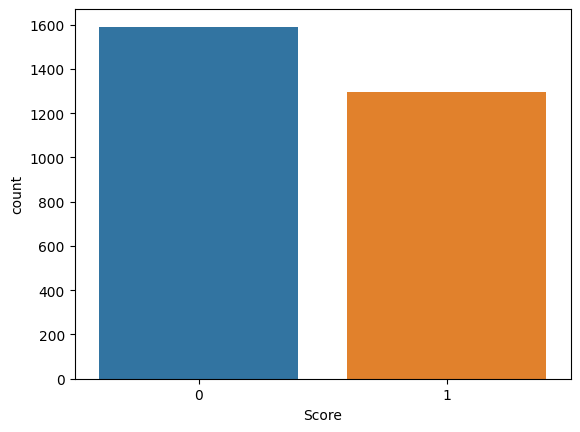

In [9]:
import seaborn as sns
sns.countplot(x='Score', data=df)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(main_data)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df['Score'], test_size=0.3, random_state=4)


In [14]:
LogReg = LogisticRegression().fit(X_train, y_train)
accuracy1 = LogReg.score(X_test, y_test)


In [15]:
RandForest = RandomForestClassifier().fit(X_train, y_train)
accuracy2 = RandForest.score(X_test, y_test)


In [16]:
KNeighbors = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
accuracy3 = KNeighbors.score(X_test, y_test)


In [17]:
SupportVec = SVC().fit(X_train, y_train)
accuracy4 = SupportVec.score(X_test, y_test)


In [18]:
# GBC = GradientBoostingClassifier(
#     n_estimators=100, learning_rate=0.1, max_depth=25, random_state=2)
# GBC.fit(X_train, y_train)
# accuracy5 = GBC.score(X_test, y_test)


In [19]:
for i in range(1, 5):
    print("Accuracy {}: {}".format(i, eval("accuracy" + str(i))*100))


Accuracy 1: 66.78200692041523
Accuracy 2: 66.66666666666666
Accuracy 3: 63.667820069204154
Accuracy 4: 67.35870818915801


In [20]:
import numpy as np

In [21]:
def sentiPrediction(input_data):
    input_data = remove_stopwords(input_data)
    print(input_data)
    new_statement = vectorizer.transform([input_data])
    prediction1 = LogReg.predict(new_statement)
    prediction2 = RandForest.predict(new_statement)
    prediction3 = SupportVec.predict(new_statement)
    prediction4 = GBC.predict(new_statement)
    prediction5 = KNeighbors.predict(new_statement)
    all_predictions = [prediction1[0], prediction2[0],
                       prediction3[0], prediction4[0], prediction5[0]]
    print(all_predictions)
    final_prediction = np.bincount(all_predictions).argmax()
    print("The final prediction for the new statement is:", final_prediction)


In [22]:
import pickle

In [23]:
# Saving the Logistic Regression model
with open('LogReg_gujarati.pickle', 'wb') as handle:
    pickle.dump(LogReg, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the Random Forest model
with open('RandForest_gujarati.pickle', 'wb') as handle:
    pickle.dump(RandForest, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the KNeighbors model
with open('KNeighbors_gujarati.pickle', 'wb') as handle:
    pickle.dump(KNeighbors, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the Support Vector Machine model
with open('SupportVec_gujarati.pickle', 'wb') as handle:
    pickle.dump(SupportVec, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the Gradient Boosting model
# with open('GBC_gujarati.pickle', 'wb') as handle:
#     pickle.dump(GBC, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [24]:
# text = input()
# sentiPrediction(text)

In [25]:
with open("vectorizer_gujarati.pickle", "wb") as f:
    pickle.dump(vectorizer, f)